# Imports 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Ellipse
import seaborn as sns
import math
import matplotlib.pylab as pyl
import pickle
import swifter
import warnings
import plotly.express as px
from itertools import chain
import scipy.stats as sps
import itertools
import os
from tqdm import tqdm
warnings.filterwarnings('ignore')

In [10]:
#pd.set_option('max_colwidth', 999)
pd.set_option('display.max_columns', 1000)
pd.set_option("display.max_rows", 3000)
warnings.filterwarnings('ignore')

# Data 

**For reference-**

**RRRL stands for a defence line up with preferred feet of the order (from right back to left back): right footed - right footed - right footed - left footed**

**RRLL stands for a defence line up with preferred feet of the order (from right back to left back): right footed - right footed - left footed - left footed**

In [11]:
rrrl = pd.read_pickle('../data/clusters/clusters_v3/cluster_rrrl.pkl')
rrrl.reset_index(drop=True, inplace=True)
rrrl.head()

wyId       team                                       team_defense  \
0  2500089    Burnley  [MatthewLowton, KevinLong, JamesTarkowski, Ste...   
1  2500097  Leicester  [DannySimpson, WesMorgan, HarryMaguire, Christ...   
2  2500096      Stoke  [MoritzBauer, RyanShawcross, KurtZouma, ErikPi...   
3  2500093    Watford  [DarylJanmaat, CraigCathcart, ChristianKabasel...   
4  2500092   Brighton  [EzequielSchelotto, ShaneDuffy, LewisDunk, Gae...   

                  RB           R_CB               L_CB              LB  RCB  \
0      MatthewLowton      KevinLong     JamesTarkowski     StephenWard  NaN   
1       DannySimpson      WesMorgan       HarryMaguire  ChristianFuchs  NaN   
2        MoritzBauer  RyanShawcross          KurtZouma     ErikPieters  NaN   
3       DarylJanmaat  CraigCathcart  ChristianKabasele     JoseHolebas  NaN   
4  EzequielSchelotto     ShaneDuffy          LewisDunk      GaetanBong  NaN   

    CB  LCB  RWB  LWB  backline                match  gameweek  \
0  NaN  NaN  NaN  NaN         4  Burnley-Bournemouth        38   
1  NaN  NaN  NaN  NaN         4      Spurs-Leicester        38   
2  NaN  NaN  NaN  NaN         4        Swansea-Stoke        38   
3  NaN  NaN  NaN  NaN         4      Man Utd-Watford        38   
4  NaN  NaN  NaN  NaN         4   Liverpool-Brighton        38   

                                           teamsData              dateutc  \
0  {'1646': {'scoreET': 0, 'coachId': 8880, 'side...  2018-05-13 14:00:00   
1  {'1631': {'scoreET': 0, 'coachId': 209010, 'si...  2018-05-13 14:00:00   
2  {'10531': {'scoreET': 0, 'coachId': 32573, 'si...  2018-05-13 14:00:00   
3  {'1644': {'scoreET': 0, 'coachId': 93112, 'sid...  2018-05-13 14:00:00   
4  {'1651': {'scoreET': 0, 'coachId': 8093, 'side...  2018-05-13 14:00:00   

             venue                                           referees  score  \
0        Turf Moor  [{'refereeId': 385705, 'role': 'referee'}, {'r...  1 - 2   
1  Wembley Stadium  [{'refereeId': 378951, 'role': 'referee'}, {'r...  5 - 4   
2  Liberty Stadium  [{'refereeId': 378952, 'role': 'referee'}, {'r...  1 - 2   
3     Old Trafford  [{'refereeId': 381853, 'role': 'referee'}, {'r...  1 - 0   
4          Anfield  [{'refereeId': 385704, 'role': 'referee'}, {'r...  4 - 0   

               footedness  RB_pass  RB_accpass  RB_highpass  RB_acchighpass  \
0  right-right-right-left       38          25            3               2   
1  right-right-right-left       15           7            5               2   
2  right-right-right-left       19          16            1               1   
3  right-right-right-left       44          36            4               3   
4  right-right-right-left       29          22            4               1   

                                       RB_accpassloc  \
0  [[[33.28, 11.56], [20.8, 23.8]], [[12.48, 9.52...   
1  [[[33.28, 6.8], [11.44, 26.52]], [[17.68, 14.9...   
2  [[[81.12, 11.56], [68.64, 29.92]], [[13.52, 22...   
3  [[[59.28, 1.36], [38.48, 16.32]], [[64.48, 2.0...   
4  [[[60.32, 8.84], [61.36, 6.12]], [[35.36, 17.0...   

                                     RB_inaccpassloc  \
0  [[[67.6, 6.8], [76.96, 0.0]], [[28.08, 8.84], ...   
1  [[[23.92, 3.4], [73.84, 34.68]], [[33.28, 1.36...   
2  [[[88.4, 10.88], [104.0, 0.0]], [[72.8, 2.72],...   
3  [[[83.2, 6.12], [104.0, 0.0]], [[71.76, 11.56]...   
4  [[[46.8, 8.16], [58.24, 3.4]], [[16.64, 4.08],...   

                                   RB_acchighpassloc  \
0  [[[38.48, 5.44], [62.4, 10.2]], [[49.92, 14.28...   
1  [[[16.64, 11.56], [38.48, 1.36]], [[15.6, 13.6...   
2                     [[[5.2, 14.28], [40.56, 6.8]]]   
3  [[[64.48, 2.04], [91.52, 21.08]], [[28.08, 2.0...   
4                    [[[36.4, 8.84], [76.96, 2.04]]]   

                                 RB_inacchighpassloc  R_CB_pass  R_CB_accpass  \
0                   [[[30.16, 4.76], [93.6, 19.04]]]         45            39   
1  [[[23.92, 3.4], [73.84, 34.68]], [[55.12, 1.36...         13            11   
2   

In [12]:
rrll = pd.read_pickle('../data/clusters/clusters_v3/cluster_rrll.pkl')
rrll.reset_index(drop=True, inplace=True)
rrll.head()

wyId            team                                       team_defense  \
0  2500090  Crystal Palace  [AaronWanBissaka, JamesTomkins, MamadouSakho, ...   
1  2500095        Man City  [Danilo, JohnStones, AymericLaporte, FabianDelph]   
2  2500086  Crystal Palace  [JoelWard, JamesTomkins, MamadouSakho, Patrick...   
3  2500072           Stoke  [KurtZouma, RyanShawcross, BrunoMartinsIndi, E...   
4  2500070  Crystal Palace  [JoelWard, JamesTomkins, MamadouSakho, Patrick...   

                RB           R_CB              L_CB                 LB  RCB  \
0  AaronWanBissaka   JamesTomkins      MamadouSakho  PatrickvanAanholt  NaN   
1           Danilo     JohnStones    AymericLaporte        FabianDelph  NaN   
2         JoelWard   JamesTomkins      MamadouSakho  PatrickvanAanholt  NaN   
3        KurtZouma  RyanShawcross  BrunoMartinsIndi        ErikPieters  NaN   
4         JoelWard   JamesTomkins      MamadouSakho  PatrickvanAanholt  NaN   

    CB  LCB  RWB  LWB  backline                     match  gameweek  \
0  NaN  NaN  NaN  NaN         4  Crystal Palace-West Brom        38   
1  NaN  NaN  NaN  NaN         4      Southampton-Man City        38   
2  NaN  NaN  NaN  NaN         4      Stoke-Crystal Palace        37   
3  NaN  NaN  NaN  NaN         4           Liverpool-Stoke        36   
4  NaN  NaN  NaN  NaN         4  Crystal Palace-Leicester        36   

                                           teamsData              dateutc  \
0  {'1628': {'scoreET': 0, 'coachId': 8357, 'side...  2018-05-13 14:00:00   
1  {'1625': {'scoreET': 0, 'coachId': 267136, 'si...  2018-05-13 14:00:00   
2  {'1639': {'scoreET': 0, 'coachId': 8329, 'side...  2018-05-05 11:30:00   
3  {'1639': {'scoreET': 0, 'coachId': 0, 'side': ...  2018-04-28 11:30:00   
4  {'1631': {'scoreET': 0, 'coachId': 209010, 'si...  2018-04-28 14:00:00   

                venue                                           referees  \
0       Selhurst Park  [{'refereeId': 381851, 'role': 'referee'}, {'r...   
1  St. Mary's Stadium  [{'refereeId': 385911, 'role': 'referee'}, {'r...   
2      Bet365 Stadium  [{'refereeId': 384888, 'role': 'referee'}, {'r...   
3             Anfield  [{'refereeId': 385911, 'role': 'referee'}, {'r...   
4       Selhurst Park  [{'refereeId': 385909, 'role': 'referee'}, {'r...   

   score             footedness  RB_pass  RB_accpass  RB_highpass  \
0  2 - 0  right-right-left-left       58          53            1   
1  0 - 1  right-right-left-left       76          70            2   
2  1 - 2  right-right-left-left       13          11            2   
3  0 - 0  right-right-left-left       15           9            6   
4  5 - 0  right-right-left-left       33          27            2   

   RB_acchighpass                                      RB_accpassloc  \
0               1  [[[60.32, 11.56], [70.72, 8.84]], [[55.12, 11....   
1               1  [[[59.28, 4.08], [68.64, 26.52]], [[58.24, 9.5...   
2               1  [[[53.04, 34.0], [75.92, 34.68]], [[58.24, 2.7...   
3               2  [[[17.68, 11.56], [34.32, 17.0]], [[17.68, 6.1...   
4               2  [[[31.2, 17.68], [57.2, 6.12]], [[26.0, 6.8], ...   

                                     RB_inaccpassloc  \
0  [[[86.32, 22.44], [87.36, 25.84]], [[98.8, 10....   
1  [[[38.48, 10.88], [40.56, 6.8]], [[35.36, 10.2...   
2  [[[59.28, 2.72], [104.0, 2.72]], [[28.08, 2.72...   
3  [[[47.84, 6.12], [71.76, 0.0]], [[34.32, 8.16]...   
4  [[[34.32, 6.8], [69.68, 22.44]], [[13.52, 5.44...   

                                   RB_acchighpassloc  \
0                   [[[24.96, 6.8], [45.76, 15.64]]]   
1                   [[[65.52, 8.84], [85.28, 4.76]]]   
2                   [[[78.0, 2.72], [87.36, 46.92]]]   
3  [[[17.68, 6.12], [63.44, 13.6]], [[28.08, 63.2...   
4  [[[37.44, 8.84], [75.92, 6.8]], [[28.08, 4.08]...   

                                 RB_inacchighpassloc  R_CB_pass  R_CB_accpass  \
0                                                 []         43            39   
1            

In [13]:
three_five_clusters = ['rrl','rrr','rll','rrrll','rrrrl','rlr','rrrlr','rrlll']
lcb_lf_clusters = ['rrl','rll','rrrll','rrrlr','rrlll']
lcb_rf_clusters = ['rrr','rrrrl','rlr']
path = '../data/clusters/clusters_v3'
lcb_lf_files = [os.path.join(path,f"cluster_{name}.pkl") for name in lcb_lf_clusters]
lcb_rf_files = [os.path.join(path,f"cluster_{name}.pkl") for name in lcb_rf_clusters]
lcb_lf = pd.concat((pd.read_pickle(file) for file in lcb_lf_files), axis = 0, ignore_index = True)
lcb_rf = pd.concat((pd.read_pickle(file) for file in lcb_rf_files), axis = 0, ignore_index = True)

# Functions 

## Plot a Football Pitch

{x:[0,104]; y:[0,68]}

In [14]:
def draw_pitch(line, orientation,view):
    
    orientation = orientation
    view = view
    line = line
    
    if orientation.lower().startswith("h"):
        
        if view.lower().startswith("h"):
            fig,ax = plt.subplots(figsize=(6.8,10.4))
            plt.xlim(49,105)
            plt.ylim(-1,69)
        else:
            fig,ax = plt.subplots(figsize=(10.4,6.8))
            plt.xlim(-1,105)
            plt.ylim(-1,69)
        ax.axis('off') # this hides the x and y ticks
    
        # side and goal lines #
        ly1 = [0,0,68,68,0]
        lx1 = [0,104,104,0,0]

        plt.plot(lx1,ly1,color=line,zorder=5)


        # boxes, 6 yard box and goals

            #outer boxes#
        ly2 = [13.84,13.84,54.16,54.16] 
        lx2 = [104,87.5,87.5,104]
        plt.plot(lx2,ly2,color=line,zorder=5)

        ly3 = [13.84,13.84,54.16,54.16] 
        lx3 = [0,16.5,16.5,0]
        plt.plot(lx3,ly3,color=line,zorder=5)

            #goals#
        ly4 = [30.34,30.34,37.66,37.66]
        lx4 = [104,104.2,104.2,104]
        plt.plot(lx4,ly4,color=line,zorder=5)

        ly5 = [30.34,30.34,37.66,37.66]
        lx5 = [0,-0.2,-0.2,0]
        plt.plot(lx5,ly5,color=line,zorder=5)


           #6 yard boxes#
        ly6 = [24.84,24.84,43.16,43.16]
        lx6 = [104,99.5,99.5,104]
        plt.plot(lx6,ly6,color=line,zorder=5)

        ly7 = [24.84,24.84,43.16,43.16]
        lx7 = [0,4.5,4.5,0]
        plt.plot(lx7,ly7,color=line,zorder=5)

        #Halfway line, penalty spots, and kickoff spot
        ly8 = [0,68] 
        lx8 = [52,52]
        plt.plot(lx8,ly8,color=line,zorder=5)


        circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=2,alpha=1)
        circle4 = plt.Circle((93, 34), 0.2,ls='solid',lw=1.5,color=line, fill=False, alpha=1)
        circle5 = plt.Circle((11, 34), 0.2,ls='solid',lw=1.5,color=line, fill=False, alpha=1)
        circle6 = plt.Circle((52, 34), 0.2,ls='solid',lw=1.5,color=line, fill=False, alpha=1)

        ## Rectangles in boxes
        rec1 = plt.Rectangle((87.5,20), 16,30,ls='-', color="None", zorder=1,alpha=1)
        rec2 = plt.Rectangle((0, 20), 16.5,30,ls='-', color='None', zorder=1,alpha=1)

        ## Pitch rectangle
        rec3 = plt.Rectangle((-1, -1), 106,70,ls='-',color="None", zorder=1,alpha=1)

        ax.add_artist(rec3)
        ax.add_artist(rec1)
        ax.add_artist(rec2)
        ax.add_artist(circle3)
        ax.add_artist(circle4)
        ax.add_artist(circle5)
        ax.add_artist(circle6)
        
    else:
        if view.lower().startswith("h"):
            fig,ax = plt.subplots(figsize=(10.4,6.8))
            plt.ylim(49,105)
            plt.xlim(-1,69)
        else:
            fig,ax = plt.subplots(figsize=(6.8,10.4))
            plt.ylim(-1,105)
            plt.xlim(-1,69)
        ax.axis('off') # this hides the x and y ticks

        # side and goal lines #
        lx1 = [0,0,68,68,0]
        ly1 = [0,104,104,0,0]

        plt.plot(lx1,ly1,color=line,zorder=5)


        # boxes, 6 yard box and goals

            #outer boxes#
        lx2 = [13.84,13.84,54.16,54.16] 
        ly2 = [104,87.5,87.5,104]
        plt.plot(lx2,ly2,color=line,zorder=5)

        lx3 = [13.84,13.84,54.16,54.16] 
        ly3 = [0,16.5,16.5,0]
        plt.plot(lx3,ly3,color=line,zorder=5)

            #goals#
        lx4 = [30.34,30.34,37.66,37.66]
        ly4 = [104,104.2,104.2,104]
        plt.plot(lx4,ly4,color=line,zorder=5)

        lx5 = [30.34,30.34,37.66,37.66]
        ly5 = [0,-0.2,-0.2,0]
        plt.plot(lx5,ly5,color=line,zorder=5)


           #6 yard boxes#
        lx6 = [24.84,24.84,43.16,43.16]
        ly6 = [104,99.5,99.5,104]
        plt.plot(lx6,ly6,color=line,zorder=5)

        lx7 = [24.84,24.84,43.16,43.16]
        ly7 = [0,4.5,4.5,0]
        plt.plot(lx7,ly7,color=line,zorder=5)

        #Halfway line, penalty spots, and kickoff spot
        lx8 = [0,68] 
        ly8 = [52,52]
        plt.plot(lx8,ly8,color=line,zorder=5)


        plt.scatter(34,93,color=line,zorder=5)
        plt.scatter(34,11,color=line,zorder=5)
        plt.scatter(34,52,color=line,zorder=5)

        circle1 = plt.Circle((34,93.5), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle2 = plt.Circle((34,10.5), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle3 = plt.Circle((34,52), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=2,alpha=1)


        ## Rectangles in boxes
        rec1 = plt.Rectangle((20, 87.5), 30,16.5,ls='-',color=pitch, zorder=1,alpha=1)
        rec2 = plt.Rectangle((20, 0), 30,16.5,ls='-',color=pitch, zorder=1,alpha=1)

        ## Pitch rectangle
        rec3 = plt.Rectangle((-1, -1), 70,106,ls='-',color=pitch, zorder=1,alpha=1)

        ax.add_artist(rec3)
        ax.add_artist(circle1)
        ax.add_artist(circle2)
        ax.add_artist(rec1)
        ax.add_artist(rec2)
        ax.add_artist(circle3)
        
        
    return fig, ax

(<Figure size 748.8x489.6 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd2024bfc50>)

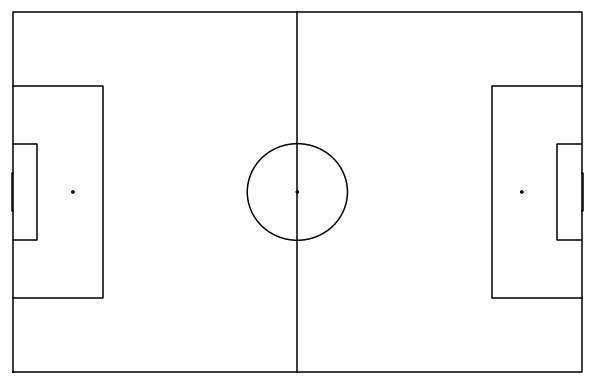

In [15]:
draw_pitch("#000000","h","full")

## Plot Event Data points on the Pitch 

In [16]:
def plot_points(x,y,c):
    draw_pitch("#faf0e6","h","full")
    plt.scatter(x,y,marker='o',color=c,edgecolors="black", zorder=12)
    plt.show()

## Get (x,y) coordinates from DataFrame 

In [17]:
def get_xy(df, col, n, m): #n - no of row entries
    # m = 0: Initial Position
    # m = 1: Final Position
    x=list()
    y=list()
    for i in range(0,n):
        for j in range(0, len(df[col][i])):
            for k in range(0,2):
                x.append(df[col][i][j][k][0])
                y.append(df[col][i][j][k][1])
    x = [x[i] for i in range(0+m, len(x), 2)]
    y = [y[i] for i in range(0+m, len(y), 2)]
    return x, y

## Plot Event Data Heatmap on Pitch 

In [18]:
def heatmap(x, y, title, c):
    fig, ax = draw_pitch("#000000","h","full")
    sns.kdeplot(x, y, cmap = c, shade = True)
    plt.title(title, fontsize = 30)
    plt.xlim(-1,105)
    plt.ylim(-1,69)
    plt.axis('off')
    plt.show()

## Compute and generate KDE of Pass Distances 

In [19]:
def compute_dist_pdf(df, col):
    dist=list()
    for j in range(0, len(df)):
        d = [np.subtract(i[1], i[0]) for i in df[col][j]]
        d = [list(np.square(i)) for i in d]
        d = [(i[0]+i[1])**(0.5) for i in d]
        dist.append(d)
    sns.set(color_codes=True)
    sns.kdeplot(list(itertools.chain(*dist)), shade=True)
    return dist

## Coordinates of Long Passes 

Long Pass - Pass distance >= 35 meters

In [20]:
def dist_threshold(df, col, n, m):
    x=list()
    y=list()
    x1=list()
    y1=list()
    for i in range(0,n):
        for j in range(0, len(df[col][i])):
            for k in range(0,2):
                x.append(df[col][i][j][k][0])
                y.append(df[col][i][j][k][1])
                
    for i in range(0, len(x), 2):
        dist = ((x[i] - x[i+1])**2 + (y[i] - y[i+1])**2)**(0.5)
        if (dist >= 35):
            x1.append(x[i])
            x1.append(x[i+1])
            y1.append(y[i])
            y1.append(y[i+1])
        else:
            continue
    
    x1 = [x1[i] for i in range(0+m, len(x1), 2)]
    y1 = [y1[i] for i in range(0+m, len(y1), 2)]
    
    return x1,y1

## Get total passes in each region of the pitch 

In [21]:
def get_region(x, y):

    x_rightflank_attack = [
        x[i] for i in range(len(x)) if (x[i] >= 52) and (y[i] <= 17)
    ]
    y_rightflank_attack = [
        y[i] for i in range(len(x)) if (x[i] >= 52) and (y[i] <= 17)
    ]
    x_rightflank_def = [
        x[i] for i in range(len(x)) if (x[i] < 52) and (y[i] <= 17)
    ]
    y_rightflank_def = [
        y[i] for i in range(len(x)) if (x[i] < 52) and (y[i] <= 17)
    ]

    x_leftflank_attack = [
        x[i] for i in range(len(x)) if (x[i] >= 52) and (y[i] > 51)
    ]
    y_leftflank_attack = [
        y[i] for i in range(len(x)) if (x[i] >= 52) and (y[i] > 51)
    ]
    x_leftflank_def = [
        x[i] for i in range(len(x)) if (x[i] < 52) and (y[i] > 51)
    ]
    y_leftflank_def = [
        y[i] for i in range(len(x)) if (x[i] < 52) and (y[i] > 51)
    ]

    x_rightcentral_attack = [
        x[i] for i in range(len(x))
        if (x[i] >= 52) and (y[i] > 17) and (y[i] <= 34)
    ]
    y_rightcentral_attack = [
        y[i] for i in range(len(x))
        if (x[i] >= 52) and (y[i] > 17) and (y[i] <= 34)
    ]
    x_rightcentral_def = [
        x[i] for i in range(len(x))
        if (x[i] < 52) and (y[i] > 17) and (y[i] <= 34)
    ]
    y_rightcentral_def = [
        y[i] for i in range(len(x))
        if (x[i] < 52) and (y[i] > 17) and (y[i] <= 34)
    ]

    x_leftcentral_attack = [
        x[i] for i in range(len(x))
        if (x[i] >= 52) and (y[i] > 34) and (y[i] <= 51)
    ]
    y_leftcentral_attack = [
        y[i] for i in range(len(x))
        if (x[i] >= 52) and (y[i] > 34) and (y[i] <= 51)
    ]
    x_leftcentral_def = [
        x[i] for i in range(len(x))
        if (x[i] < 52) and (y[i] > 34) and (y[i] <= 51)
    ]
    y_leftcentral_def = [
        y[i] for i in range(len(x))
        if (x[i] < 52) and (y[i] > 34) and (y[i] <= 51)
    ]

    return [len(x_rightflank_attack), len(x_rightflank_def), len(
        x_leftflank_attack), len(x_leftflank_def), len(
            x_rightcentral_attack), len(x_rightcentral_def), len(
                x_leftcentral_attack), len(x_leftcentral_def)]

In [22]:
def est_dense_reg(a, b, p):
    df_kde = pd.DataFrame(columns=['x', 'y'])
    df_kde['x'] = a
    df_kde['y'] = b
    kde = sps.gaussian_kde(df_kde.values.T)
    xx, yy = np.meshgrid(
    np.linspace(0, 104, 500),
    np.linspace(0, 68, 500))
    z = kde.pdf([xx.ravel(), yy.ravel()]).reshape(xx.shape)
    zi = z > np.max(z) * (p/10)
    x1 = [min(xx[zi]), max(xx[zi])]
    y1 = [min(yy[zi]), max(yy[zi])]
    return x1, y1

# Analysis & Viz 

**Convention:** Initial Locations denoted by (a,b) &
Final Locations denoted by (x,y)

##  'RRRL'  - Right Footed LCB

### Accurate Passes

In [23]:
a,b = get_xy(rrrl, 'L_CB_accpassloc', len(rrrl), 0) #Pass Initial Location

In [24]:
x,y = get_xy(rrrl, 'L_CB_accpassloc', len(rrrl), 1) #Pass Final Location

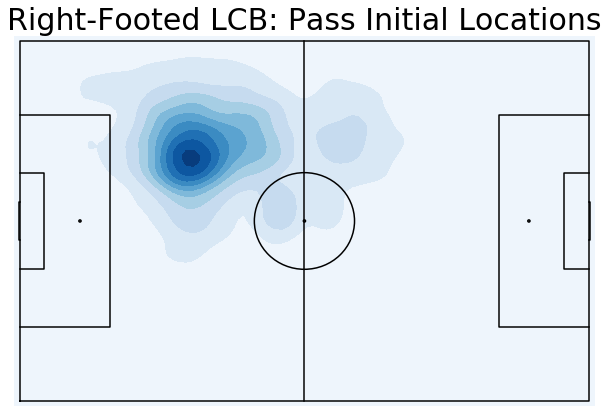

In [25]:
heatmap(a,b, 'Right-Footed LCB: Pass Initial Locations', 'Blues')

In [26]:
a,b = get_xy(rrrl, 'L_CB_acchighpassloc', len(rrrl), 0) #Aerial Pass Initial Location

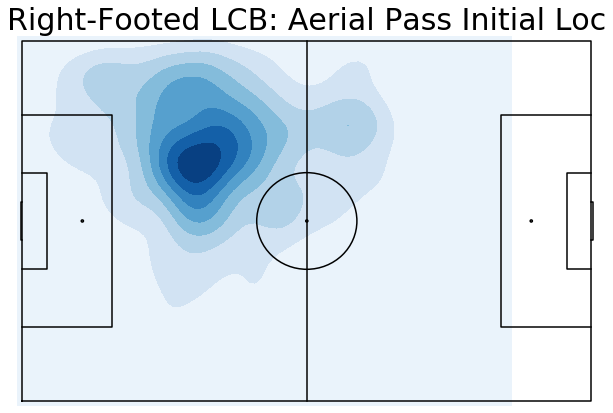

In [27]:
heatmap(a, b, 'Right-Footed LCB: Aerial Pass Initial Loc', 'Blues')

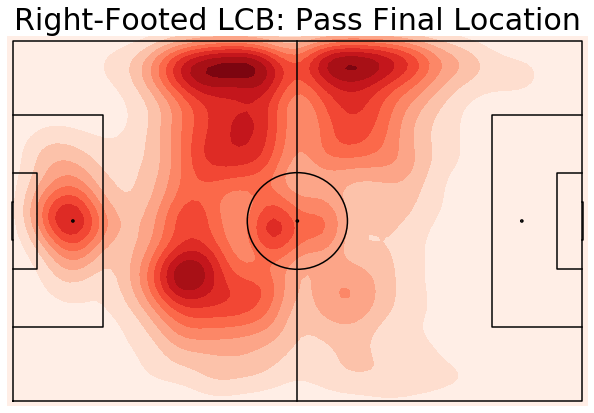

In [28]:
heatmap(x,y, 'Right-Footed LCB: Pass Final Location', 'Reds')

In [29]:
x,y = get_xy(rrrl, 'L_CB_acchighpassloc', len(rrrl), 1)

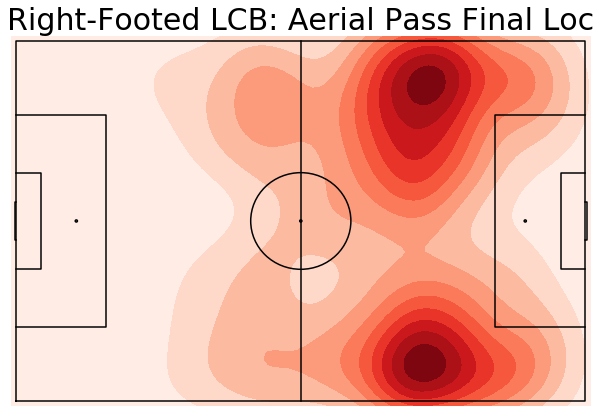

In [30]:
heatmap(x, y, 'Right-Footed LCB: Aerial Pass Final Loc', 'Reds')

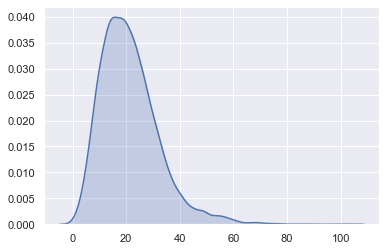

In [31]:
dist = compute_dist_pdf(rrrl, 'L_CB_accpassloc')

In [32]:
(rrrl['L_CB_accpass'].sum()/rrrl['L_CB_pass'].sum())*100

87.15294775858452

### Inaccurate Passes

In [33]:
a,b = get_xy(rrrl, 'L_CB_inaccpassloc', len(rrrl), 0)

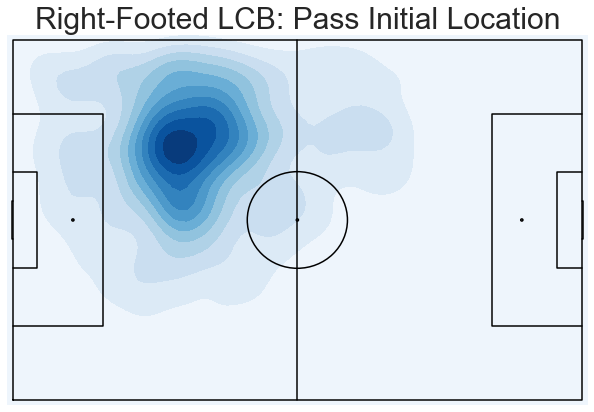

In [34]:
heatmap(a,b, 'Right-Footed LCB: Pass Initial Location', 'Blues')

In [35]:
x,y = get_xy(rrrl, 'L_CB_inaccpassloc', len(rrrl), 1)

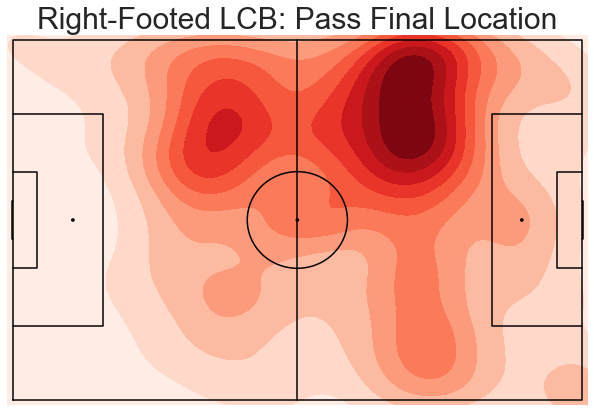

In [36]:
heatmap(x,y, 'Right-Footed LCB: Pass Final Location', 'Reds')

## 'RRLL' - Left Footed LCB

### Accurate Passes

In [37]:
a,b = get_xy(rrll, 'L_CB_accpassloc', len(rrll), 0)

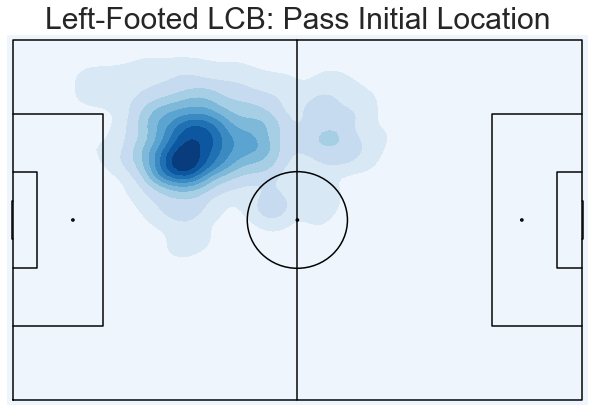

In [38]:
heatmap(a,b, 'Left-Footed LCB: Pass Initial Location', 'Blues')

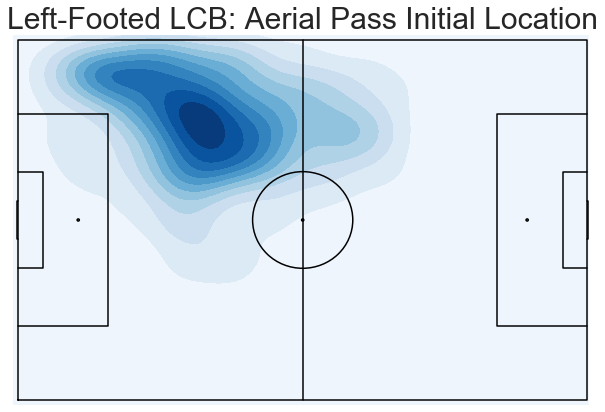

In [39]:
a,b = get_xy(rrll, 'L_CB_acchighpassloc', len(rrll), 0)
heatmap(a, b, 'Left-Footed LCB: Aerial Pass Initial Location', 'Blues')

In [40]:
x1,y1 = get_xy(rrll, 'L_CB_accpassloc', len(rrll), 1)

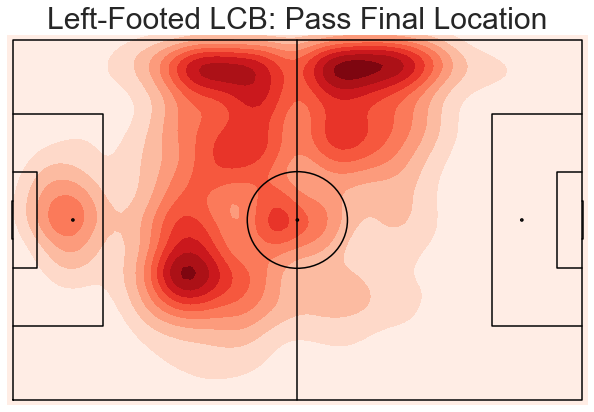

In [41]:
heatmap(x1,y1, 'Left-Footed LCB: Pass Final Location', 'Reds')

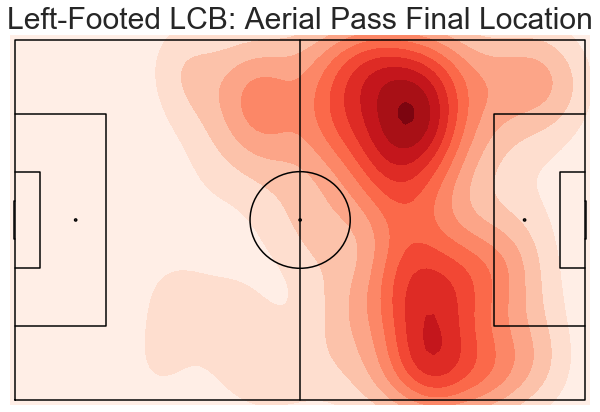

In [42]:
x,y = get_xy(rrll, 'L_CB_acchighpassloc', len(rrll), 1)
heatmap(x, y, 'Left-Footed LCB: Aerial Pass Final Location', 'Reds')

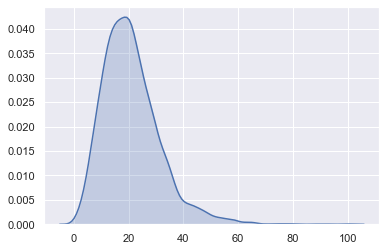

In [43]:
dist1 = compute_dist_pdf(rrll, 'L_CB_accpassloc')

In [44]:
(rrll['L_CB_accpass'].sum()/rrll['L_CB_pass'].sum())*100

88.20442334124704

In [45]:
rrll['L_CB'].value_counts()

BenMee              29
JanVertonghen       24
WesleyHoedt         19
MamadouSakho        16
RagnarKlavan        14
NathanAk            11
BrunoMartinsIndi    10
NathanAke            9
AymericLaporte       8
AngeloOgbonna        6
CiaranClark          5
KevinWimmer          4
MiguelBritos         4
MarcosRojo           3
EliaquimMangala      2
Name: L_CB, dtype: int64

### Inaccurate Passes

In [46]:
a,b = get_xy(rrll, 'L_CB_inaccpassloc', len(rrll), 0)

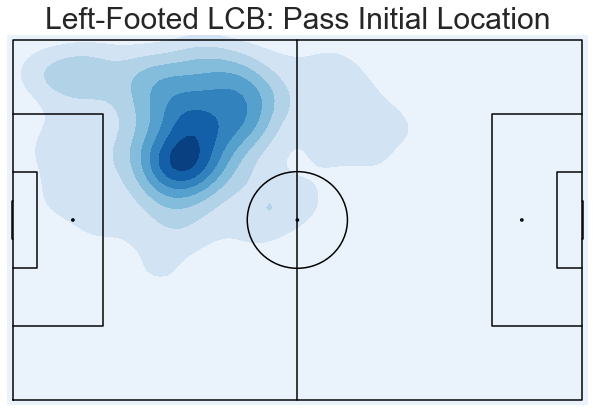

In [47]:
heatmap(a,b, 'Left-Footed LCB: Pass Initial Location', 'Blues')

In [48]:
x1,y1 = get_xy(rrll, 'L_CB_inaccpassloc', len(rrll), 1)

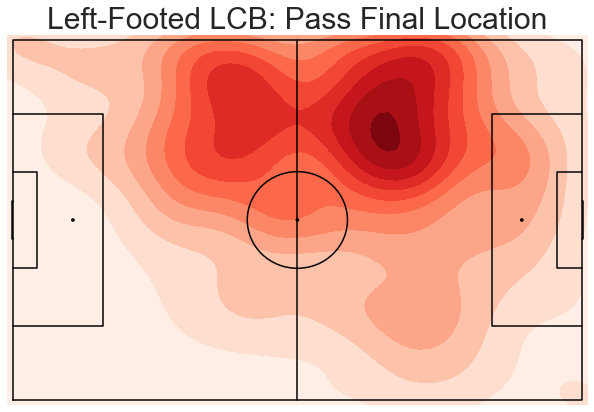

In [49]:
heatmap(x1,y1, 'Left-Footed LCB: Pass Final Location', 'Reds')

##  3 CB Formations: Left Footed LCB

In [50]:
a,b = get_xy(lcb_lf, 'LCB_accpassloc', len(lcb_lf), 0)
x,y = get_xy(lcb_lf, 'LCB_accpassloc', len(lcb_lf), 1)

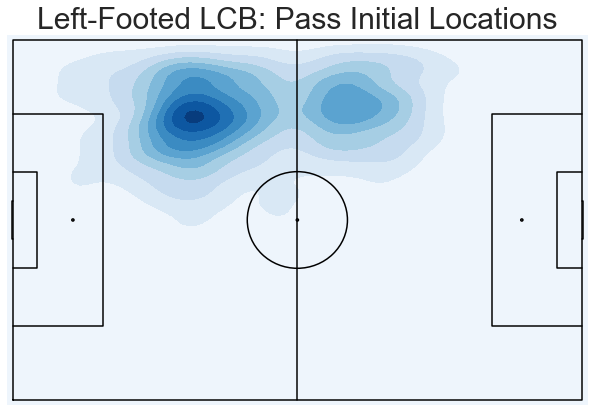

In [51]:
heatmap(a,b, 'Left-Footed LCB: Pass Initial Locations', 'Blues')

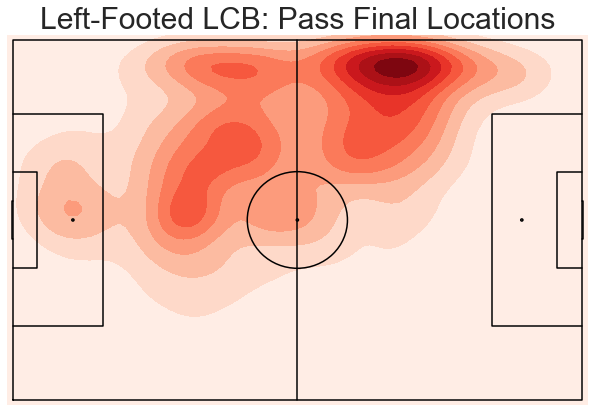

In [52]:
heatmap(x,y, 'Left-Footed LCB: Pass Final Locations', 'Reds')

## 3 CB Formations: Right footed LCB 

In [53]:
a,b = get_xy(lcb_rf, 'LCB_accpassloc', len(lcb_rf), 0)
x,y = get_xy(lcb_rf, 'LCB_accpassloc', len(lcb_rf), 1)

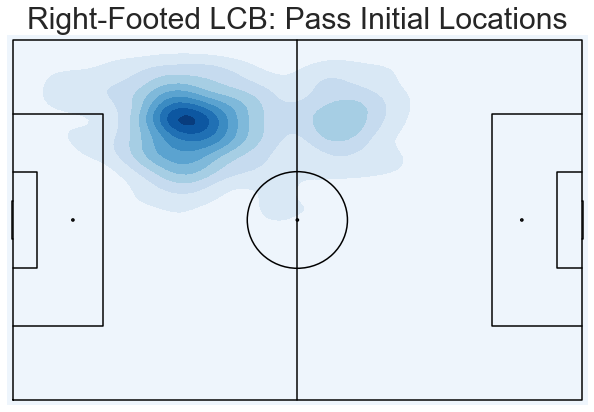

In [54]:
heatmap(a,b, 'Right-Footed LCB: Pass Initial Locations', 'Blues')

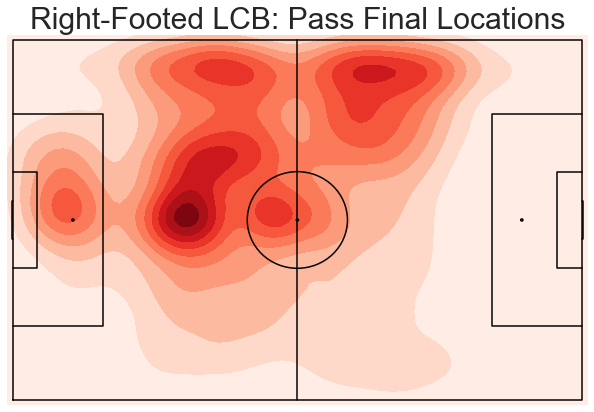

In [55]:
heatmap(x,y, 'Right-Footed LCB: Pass Final Locations', 'Reds')

# Long Distance Pass Analysis 

## RRRL - Right Footed LCB

In [56]:
r_a, r_b = dist_threshold(rrrl, 'L_CB_accpassloc', len(rrrl), 0)
r_x, r_y = dist_threshold(rrrl, 'L_CB_accpassloc', len(rrrl), 1)

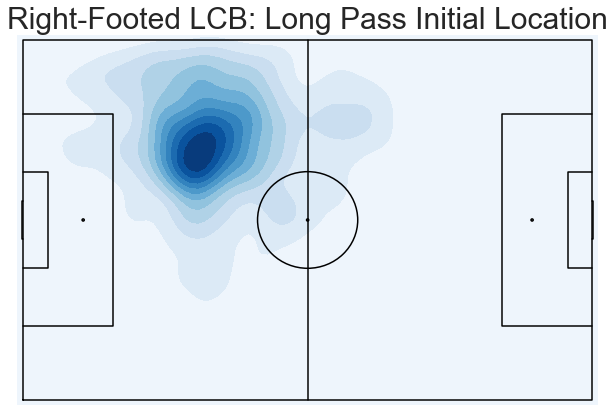

In [57]:
heatmap(r_a, r_b, 'Right-Footed LCB: Long Pass Initial Location', 'Blues')

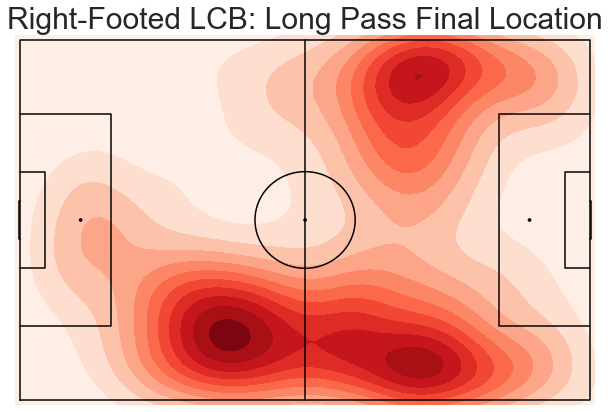

In [58]:
heatmap(r_x, r_y, 'Right-Footed LCB: Long Pass Final Location', 'Reds')

## RRLL - Left Footed LCB

In [59]:
l_a, l_b = dist_threshold(rrll, 'L_CB_accpassloc', len(rrll), 0)
l_x, l_y = dist_threshold(rrll, 'L_CB_accpassloc', len(rrll), 1)

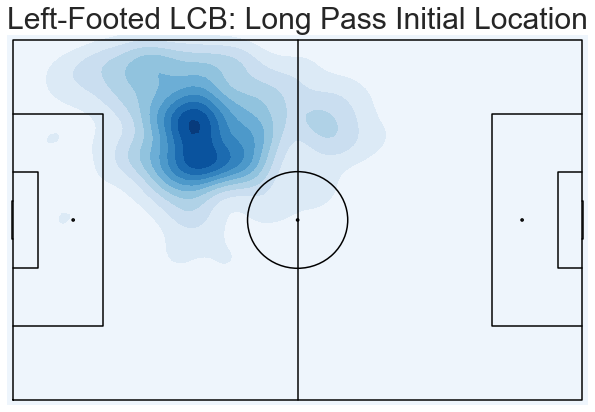

In [60]:
heatmap(l_a, l_b, 'Left-Footed LCB: Long Pass Initial Location', 'Blues')

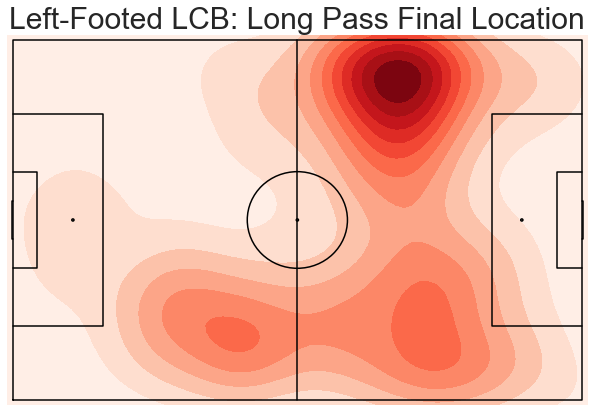

In [61]:
heatmap(l_x, l_y, 'Left-Footed LCB: Long Pass Final Location', 'Reds')

## 3 CB Formations: Left Footed LCB 

In [62]:
lf_long_i_x,lf_long_i_y = dist_threshold(lcb_lf, 'LCB_accpassloc', len(lcb_lf), 0)
lf_long_f_x,lf_long_f_y = dist_threshold(lcb_lf, 'LCB_accpassloc', len(lcb_lf), 1)

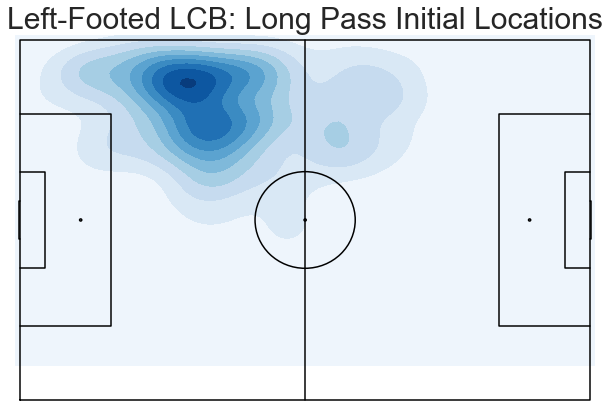

In [63]:
heatmap(lf_long_i_x,lf_long_i_y, 'Left-Footed LCB: Long Pass Initial Locations', 'Blues')

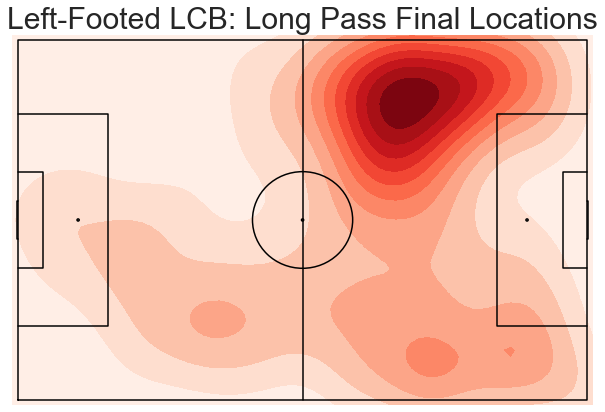

In [64]:
heatmap(lf_long_f_x,lf_long_f_y, 'Left-Footed LCB: Long Pass Final Locations', 'Reds')

##  3 CB Formations: Right Footed LCB

In [65]:
rf_long_i_x,rf_long_i_y = dist_threshold(lcb_rf, 'LCB_accpassloc', len(lcb_rf), 0)
rf_long_f_x,rf_long_f_y = dist_threshold(lcb_rf, 'LCB_accpassloc', len(lcb_rf), 1)

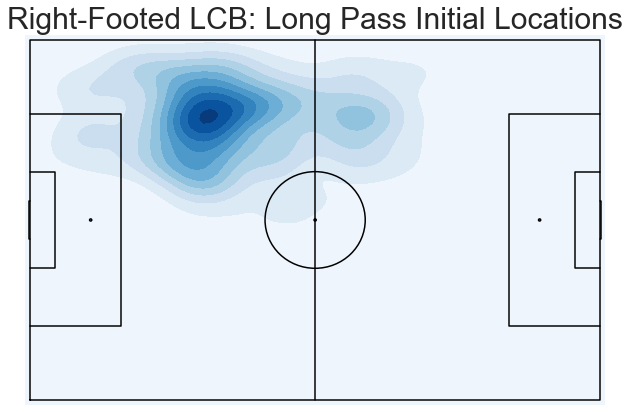

In [66]:
heatmap(rf_long_i_x,rf_long_i_y, 'Right-Footed LCB: Long Pass Initial Locations', 'Blues')

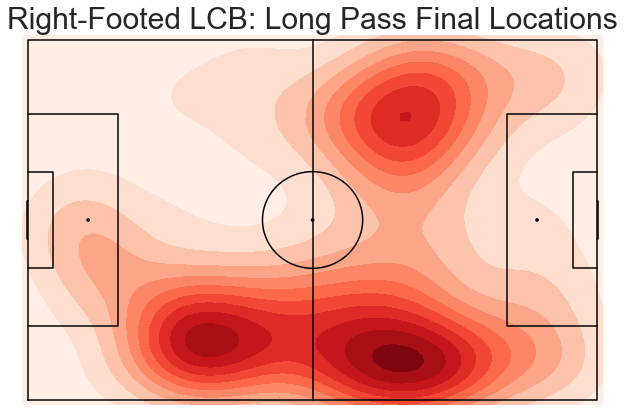

In [67]:
heatmap(rf_long_f_x,rf_long_f_y, 'Right-Footed LCB: Long Pass Final Locations', 'Reds')

# Inferences 

1. A Right footed LCB makes more accurate passes towards:<br>
    i. LM-LB region <br>
    ii. RDM region<br>
    iii. LW region<br>
2. Out of all these passes, a Right footed LCB makes aerial accurate passes more towards:<br>
    i. Extreme Left flank (LW) region <br>
    ii. Extreme Right flank (RW) region <br>
3.  A Left footed LCB makes more passes towards:<br>
    i. LW region<br>
    ii. RDM region<br>
    iii. LM-LB region<br>
4. Out of all these passes, a Left footed LCB makes aerial passes more towards:<br>
    i. Central Left flank (LW) region <br>
    ii. Central Right flank (RW) region <br>
    iii. Central Attacking Midfield region <br>
**Note**: *The Aerial Accurate Passes of a Right footed LCB are observed to be more on either flanks and much lesser central than a Left footed LCB* <br>

Upon significant observations based on aerial passes, Long Passes (35+ mtr. Passes) were analyzed. <br>
1. A Right footed LCB makes more accurate long passes towards: <br>
    i. RB-RM region <br>
    ii. Extreme RW/ Right flank region <br>
2. A Left footed LCB makes more accurate long passes towards: <br>
    i. Central LW - Central Attacking Mid region <br>
    ii. RDM to Central RW region <br>

# Region Percentages 

Order:<br>percentage(x_rightflank_attack), percentage(x_rightflank_def), percentage(
        x_leftflank_attack), percentage(x_leftflank_def), percentage(
            x_rightcentral_attack), percentage(x_rightcentral_def), percentage(
                x_leftcentral_attack), percentage(x_leftcentral_def)

## 4 CB Formations 

In [68]:
#RRRL
r = get_region(r_x, r_y)
print(r)
reg_rrrl = [(i/len(r_x))*100 for i in r]
reg_rrrl
print(len(r_x))

[301, 236, 247, 37, 96, 137, 107, 39]
1200


In [69]:
#RRLL
r = get_region(l_x, l_y)
print(r)
reg_rrll = [(i/len(l_x))*100 for i in r]
reg_rrll
print(len(l_x))

[116, 75, 175, 22, 76, 51, 69, 25]
609


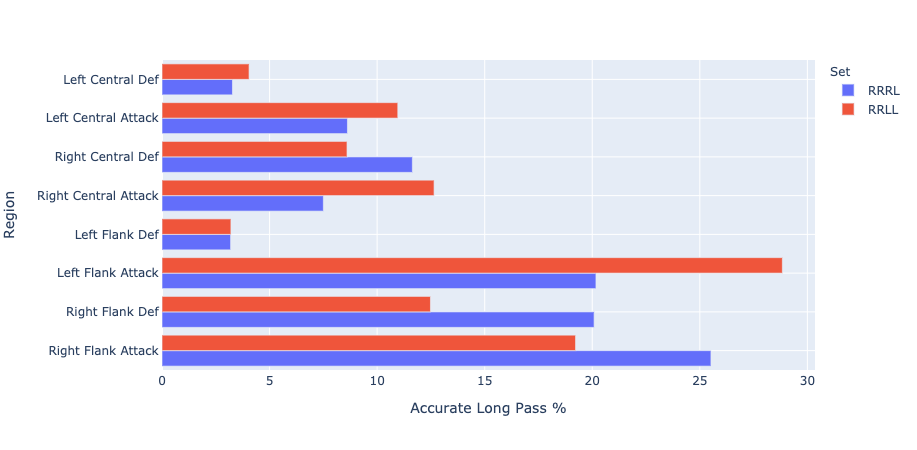

In [70]:
data_reg = [['Right Flank Attack', 25.517241379310345, 'RRRL'],
            ['Right Flank Attack',19.224283305227654, 'RRLL'],
            ['Right Flank Def', 20.086206896551726, 'RRRL'],
            ['Right Flank Def', 12.478920741989882, 'RRLL'],
            ['Left Flank Attack', 20.17241379310345, 'RRRL'],
            ['Left Flank Attack', 28.836424957841484, 'RRLL'],
            ['Left Flank Def', 3.189655172413793, 'RRRL'],
            ['Left Flank Def', 3.204047217537943, 'RRLL'],
            ['Right Central Attack', 7.5, 'RRRL'],
            ['Right Central Attack', 12.647554806070826, 'RRLL'],
            ['Right Central Def', 11.637931034482758, 'RRRL'],
            ['Right Central Def', 8.600337268128163, 'RRLL'],
            ['Left Central Attack', 8.620689655172415, 'RRRL'],
            ['Left Central Attack', 10.961214165261383, 'RRLL'],
            ['Left Central Def', 3.2758620689655173, 'RRRL'],
            ['Left Central Def', 4.0472175379426645, 'RRLL']]
reg = pd.DataFrame(data_reg, columns = ['Region', 'Accurate Long Pass %', 'Set'])
fig = px.bar(reg, x="Accurate Long Pass %", y="Region", color='Set', barmode='group', orientation='h')
fig.show()

## 3 CB Formations 

In [71]:
r_lf = get_region(lf_long_f_x,lf_long_f_y)
print(r_lf)
reg_lcb_lf = [(i/len(lf_long_f_x))*100 for i in r_lf]
reg_lcb_lf

[57, 21, 105, 10, 32, 27, 45, 13]


[18.387096774193548,
 6.774193548387098,
 33.87096774193548,
 3.225806451612903,
 10.32258064516129,
 8.709677419354838,
 14.516129032258066,
 4.193548387096775]

In [72]:
r_rf = get_region(rf_long_f_x,rf_long_f_y)
print(r_rf)
reg_lcb_rf = [(i/len(rf_long_f_x))*100 for i in r_rf]
reg_lcb_rf

[111, 78, 64, 14, 36, 38, 39, 10]


[28.46153846153846,
 20.0,
 16.41025641025641,
 3.5897435897435894,
 9.230769230769232,
 9.743589743589745,
 10.0,
 2.564102564102564]

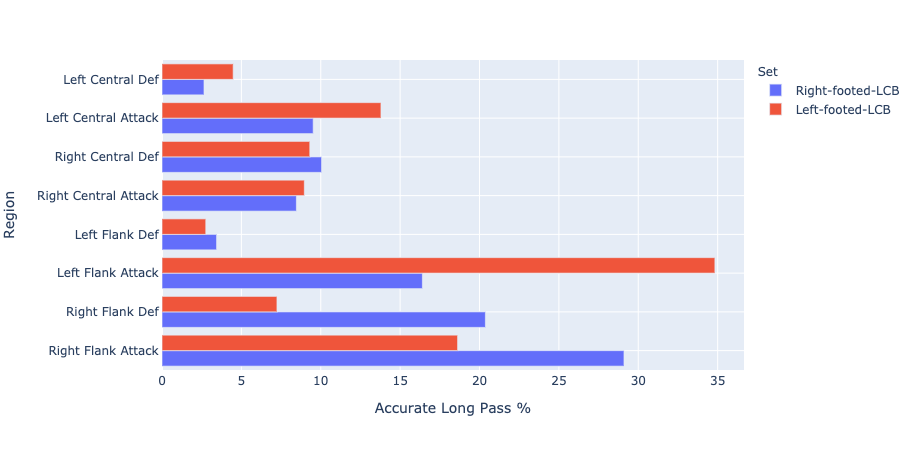

In [73]:
data_reg = [['Right Flank Attack', 29.100529100529098, 'Right-footed-LCB'],
            ['Right Flank Attack',18.620689655172416, 'Left-footed-LCB'],
            ['Right Flank Def', 20.37037037037037, 'Right-footed-LCB'],
            ['Right Flank Def', 7.241379310344828, 'Left-footed-LCB'],
            ['Left Flank Attack',16.402116402116402 , 'Right-footed-LCB'],
            ['Left Flank Attack', 34.82758620689655, 'Left-footed-LCB'],
            ['Left Flank Def', 3.439153439153439, 'Right-footed-LCB'],
            ['Left Flank Def', 2.7586206896551726, 'Left-footed-LCB'],
            ['Right Central Attack', 8.465608465608465, 'Right-footed-LCB'],
            ['Right Central Attack', 8.96551724137931, 'Left-footed-LCB'],
            ['Right Central Def',10.052910052910052 , 'Right-footed-LCB'],
            ['Right Central Def',9.310344827586208, 'Left-footed-LCB'],
            ['Left Central Attack',9.523809523809524, 'Right-footed-LCB'],
            ['Left Central Attack', 13.793103448275861, 'Left-footed-LCB'],
            ['Left Central Def',2.6455026455026456, 'Right-footed-LCB'],
            ['Left Central Def', 4.482758620689655, 'Left-footed-LCB']]
reg = pd.DataFrame(data_reg, columns = ['Region', 'Accurate Long Pass %', 'Set'])
fig = px.bar(reg, x="Accurate Long Pass %", y="Region", color='Set', barmode='group', orientation='h')
fig.show()

# Test for Statistical Significance (for significance level - 0.05)

## Right - Flank

**Null Hypothesis:** The proportion of passes made at the right flank by left footed LCB (left center back) should be greater than or equal to right footed LCB (left center back) in a lineup with four defenders<br><br>
**Alternate Hypothesis:** The proportion of passes made at the right flank by left footed LCB (left center back) should be less than right footed LCB (left center back) in a lineup with four defenders

**H0: P2 >= P1** <br>
**H1: P2 < P1** <br>
*P1 - RRRL, P2 - RRLL*

**The hypothesis stated signifies that we are performing a right tailed test**

## Test for proportions in Right Flank region

In [74]:
from statsmodels.stats.proportion import proportions_ztest
count = np.array([529, 188])
nobs = np.array([1160, 593])
stat, pval = proportions_ztest(count, nobs, alternative ='larger')
print(stat, pval)

5.600544788670087 1.0683959370895291e-08


Since the p-value is less than 0.05, we have statistically significant difference at 0.05 significance.

## Left - Flank

**Null Hypothesis:** The proportion of passes made at the left flank by right footed LCB (left center back) should be greater than or equal to left footed LCB (left center back) in a lineup with four defenders<br><br>
**Alternate Hypothesis:** The proportion of passes made at the left flank by right footed LCB (left center back) should be lesser than left footed LCB (left center back) in a lineup with four defenders

**H0: P1 >= P2** <br>
**H1: P1 < P2** <br>
*P1 - RRRL, P2 - RRLL*

**The hypothesis stated signifies that we are performing a left tailed test**

## Test for proportions in Left Flank region

In [75]:
count = np.array([271, 190])
nobs = np.array([1160, 593])
stat, pval = proportions_ztest(count, nobs,alternative='smaller')
print(stat, pval)

-3.904859425701458 4.714008630033045e-05


Since the p-value is less than 0.05, we have statistically significant difference at 0.05 significance.

## Central - Region

**Null Hypothesis:** The proportion of passes made in the central region by right footed LCB (left center back) should be equal to that of left footed LCB (left center back) in a lineup with four defenders<br><br>
**Alternate Hypothesis:** The proportion of passes made in the central region by right footed LCB (left center back) should not be equal to that of left footed LCB (left center back) in a lineup with four defenders

**H0: P1 = P2** <br>
**H1: P1 != P2** <br>
*P1 - RRRL, P2 - RRLL*

## Test for proportions in Central region

In [76]:
count = np.array([360, 215])
nobs = np.array([1160, 593])
stat, pval = proportions_ztest(count, nobs)
print(stat, pval)

-2.20325303569637 0.027576919113065083


Since the p-value is less than 0.05, we have statistically significant difference at 0.05 significance.

# Random Sampling Test
The dataset is sampled at 20% of the total number of entries (i.e. 64 samples for RRRL dataset and 32 samples for RRLL) and the process of computing the accurate long pass percentage across different regions is implemented. These steps are repeated for 50 times and the number of instances where percentage of accurate long passes at right wing and right back region by right footed LCB defender surpasses that of a left footed defender at the same position are noted.

In [77]:
def sample_test(df1, df2, col, n, m):
    # df1 - Right footed LCB
    # df1 - Left footed LCB
    # n - sampling fraction
    # m - no of testing iterations
    c=0
    for i in tqdm(range(m)):
        sample_df1 = df1.sample(frac = n)
        sample_df2 = df2.sample(frac = n)
        sample_df1 = sample_df1.reset_index()
        sample_df2 = sample_df2.reset_index()
        x, y = dist_threshold(sample_df1, col, len(sample_df1), 1)
        x1, y1 = dist_threshold(sample_df2, col, len(sample_df2), 1)
        r = get_region(x, y)
        r1 = get_region(x1, y1)
        if(((r[0]+r[1])/len(x)) > ((r1[0]+r1[0])/len(x1))):
            c=c+1
    print((c/m)*100)

In [78]:
sample_test(rrrl, rrll, 'L_CB_accpassloc', 0.2, 50)

100%|██████████| 50/50 [00:23<00:00,  2.17it/s]

82.0


# Rough 

In [79]:
df_kde = pd.DataFrame(columns=['x', 'y'])
df_kde['x'] = a
df_kde['y'] = b
df_kde

x      y
0     62.40  56.44
1     27.04  54.40
2     29.12  40.80
3     46.80  57.80
4     60.32  55.08
...     ...    ...
3963  38.48  57.12
3964  33.28  61.20
3965  26.00  32.64
3966  13.52  44.88
3967  28.08  63.92

[3968 rows x 2 columns]

In [80]:
df_kde.values.T

array([[62.4 , 27.04, 29.12, ..., 26.  , 13.52, 28.08],
       [56.44, 54.4 , 40.8 , ..., 32.64, 44.88, 63.92]])

In [81]:
kde = sps.gaussian_kde(df_kde.values.T)

In [82]:
xx, yy = np.meshgrid(
    np.linspace(0, 104, 500),
    np.linspace(0, 68, 500))

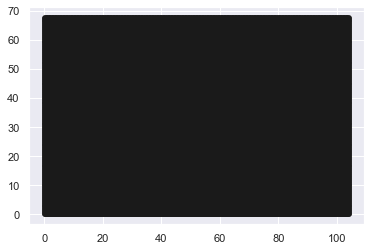

In [83]:
plt.plot(xx, yy, marker='.', color='k', linestyle='none')
plt.show()

In [84]:
xx.ravel()

array([  0.        ,   0.20841683,   0.41683367, ..., 103.58316633,
       103.79158317, 104.        ])

In [85]:
z = kde.pdf([xx.ravel(), yy.ravel()]).reshape(xx.shape)

In [86]:
zi = z > np.max(z) * 0.3

In [87]:
# print some summaries
print('x = (%.1f, %.1f)' % (min(xx[zi]), max(xx[zi])))
print('y = (%.1f, %.1f)' % (min(yy[zi]), max(yy[zi])))
print('area = %.1f' % (130 * 70 * np.mean(zi)))

x = (19.8, 66.1)
y = (40.1, 62.4)
area = 799.7


In [88]:
x1, y1 = est_dense_reg(a, b, 3)
print(x1, y1)

[19.79959919839679, 66.06813627254509] [40.06412825651302, 62.412825651302605]
